In [501]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import ast
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from tensorflow.keras.optimizers import Adam

In [502]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [503]:
airbnb_dataset = pd.read_csv('/content/drive/MyDrive/Airbnb Dataset/airbnb.csv/airbnb.csv')

In [504]:
print(airbnb_dataset.dtypes)

Unnamed: 0        int64
id                int64
name             object
rating           object
reviews          object
host_name        object
host_id         float64
address          object
features         object
amenities        object
safety_rules     object
hourse_rules     object
img_links        object
price             int64
country          object
bathrooms         int64
beds              int64
guests            int64
toiles            int64
bedrooms          int64
studios           int64
checkin          object
checkout         object
dtype: object


In [505]:
print(airbnb_dataset.isnull().sum())

Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin          800
checkout        2450
dtype: int64


In [506]:
airbnb_dataset.head(10)

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm
5,5,48650769,CasaMia White Suite Treehouse,New,0,Casamia,261290482.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,2 beds,1 bathroom","Lake view,Mountain view,Waterfront,Wifi,Dedica...",...,14729,Turkey,1,2,2,0,1,0,After 2 00 pm,12 00 pm
6,6,50765985,Ladin Bungalow,New,0,Stephen,15084529.0,"Kaş, Antalya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Garden view,Mountain view,Kitchen,Wifi,Dedicat...",...,12312,Turkey,1,1,2,0,1,0,After 3 00 pm,11 00 am
7,7,40947216,Lavender House,New,0,Caner,318794897.0,"Akçalı, Giresun, Turkey","8 guests,1 bedroom,2 beds,1 bathroom","Wifi,Dedicated workspace,Free parking on premi...",...,13655,Turkey,1,2,8,0,1,0,Flexible,NaN
8,8,34043569,Prince's,New,0,Tu,221057563.0,"Thành phố Đà Lạt, Lâm Đồng, Vietnam","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,1747,Vietnam,1,1,2,0,1,0,After 1 00 pm,11 00 am
9,9,42075682,"The Cottage, Private Pool Villa",4.67,3,Sukanya,173126583.0,"Tambon Bang Kachai, Chang Wat Chanthaburi, Tha...","10 guests,4 bedrooms,6 beds,3 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...",...,30486,Thailand,3,6,10,0,4,0,After 3 00 pm,NaN


In [507]:
airbnb_dataset['rating'] = pd.to_numeric(airbnb_dataset['rating'], errors='coerce')
airbnb_dataset['reviews'] = pd.to_numeric(airbnb_dataset['reviews'], errors='coerce')

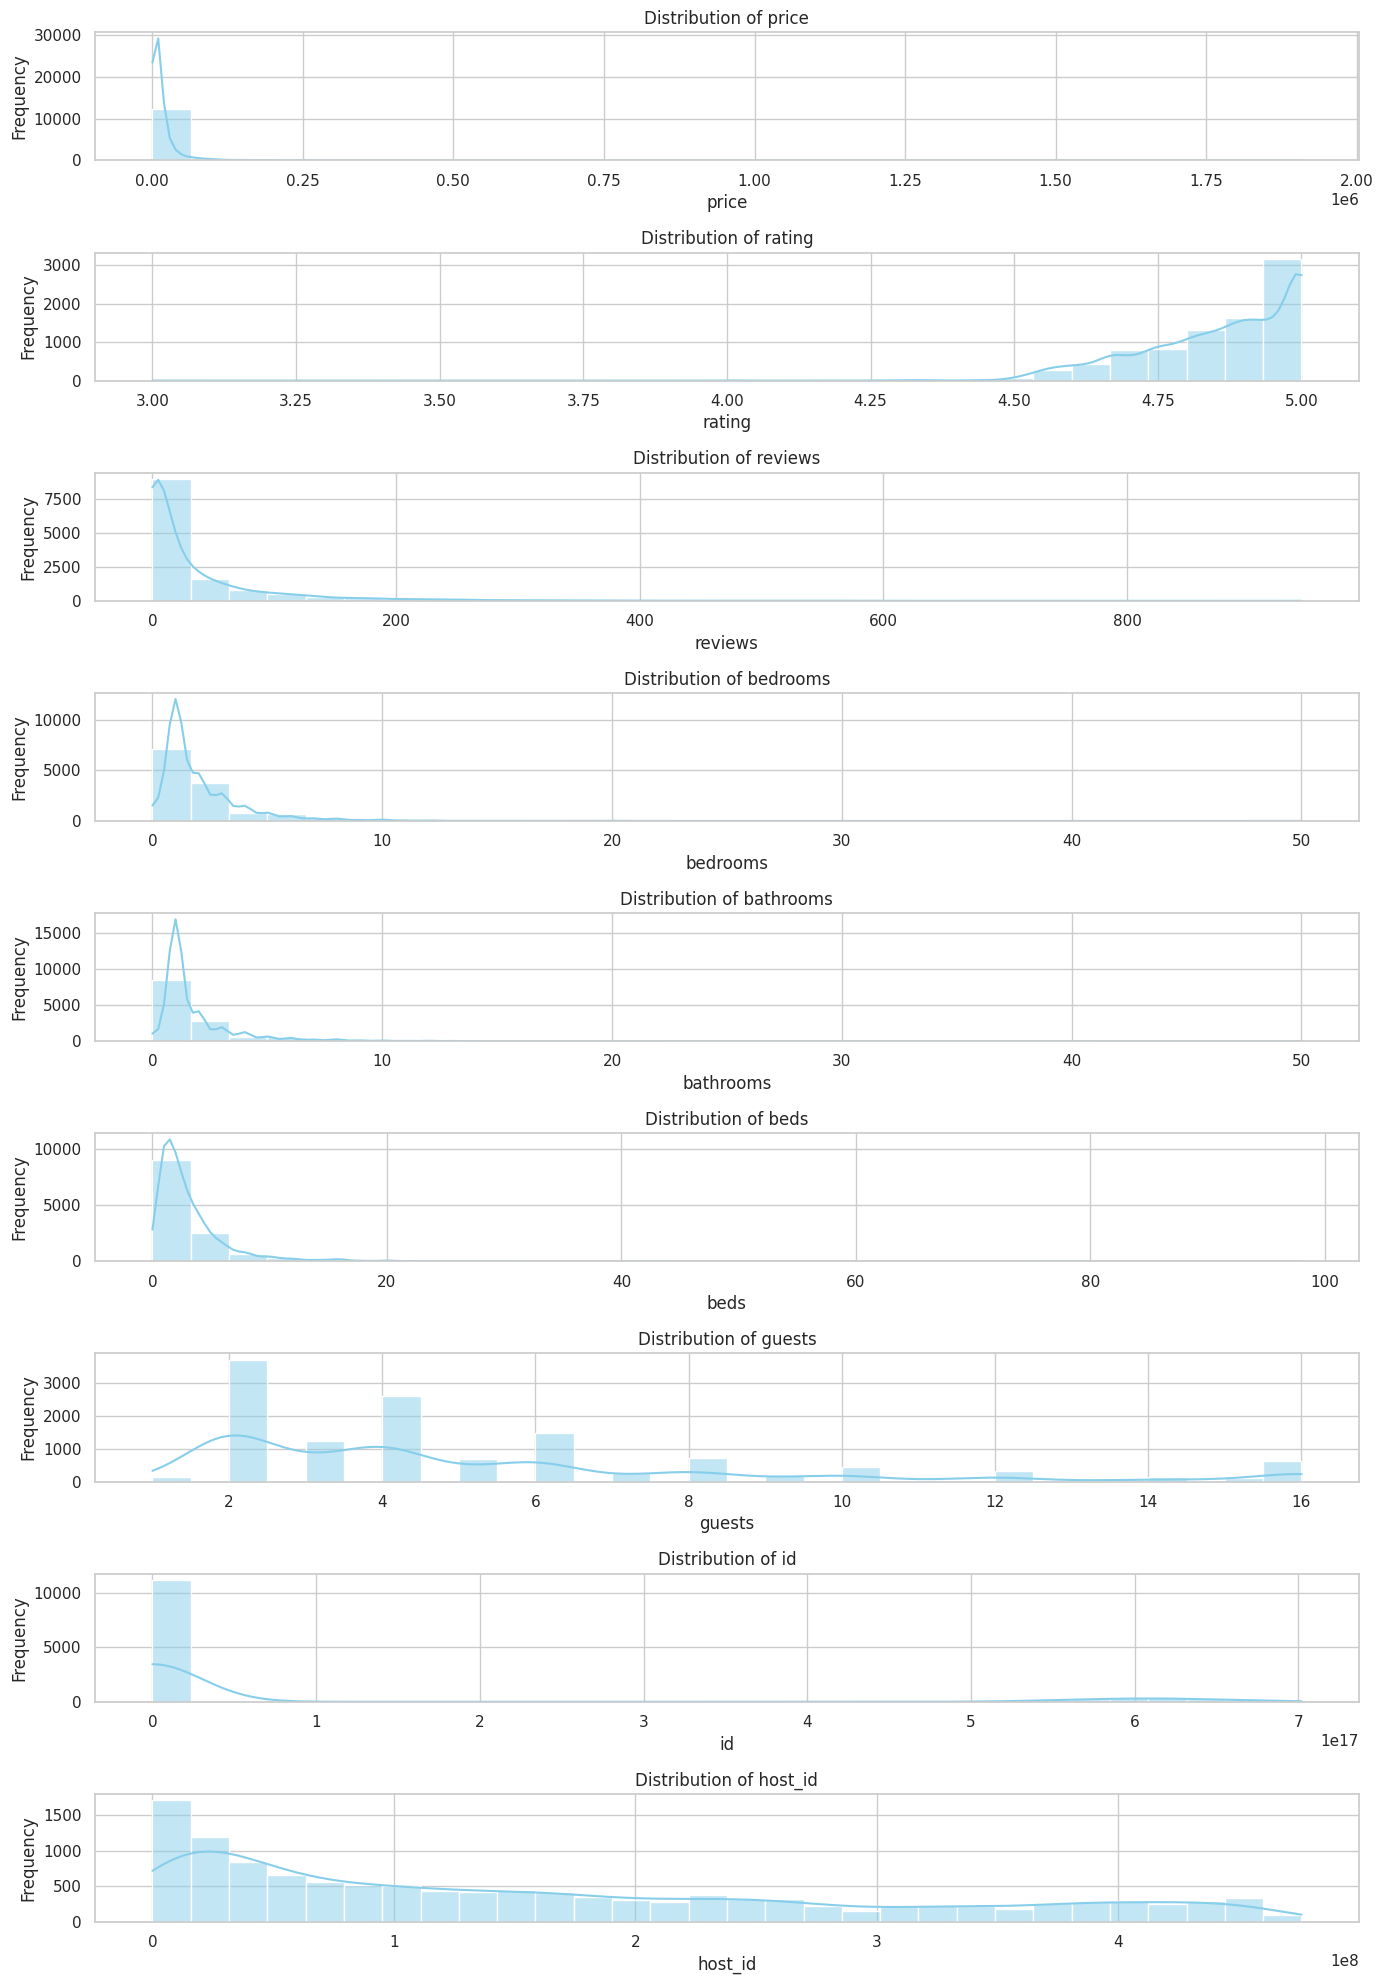

In [508]:
numerical_cols = ['price', 'rating', 'reviews', 'bedrooms', 'bathrooms', 'beds', 'guests', 'id', 'host_id']
sns.set(style="whitegrid")

plt.figure(figsize=(14, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.histplot(airbnb_dataset[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

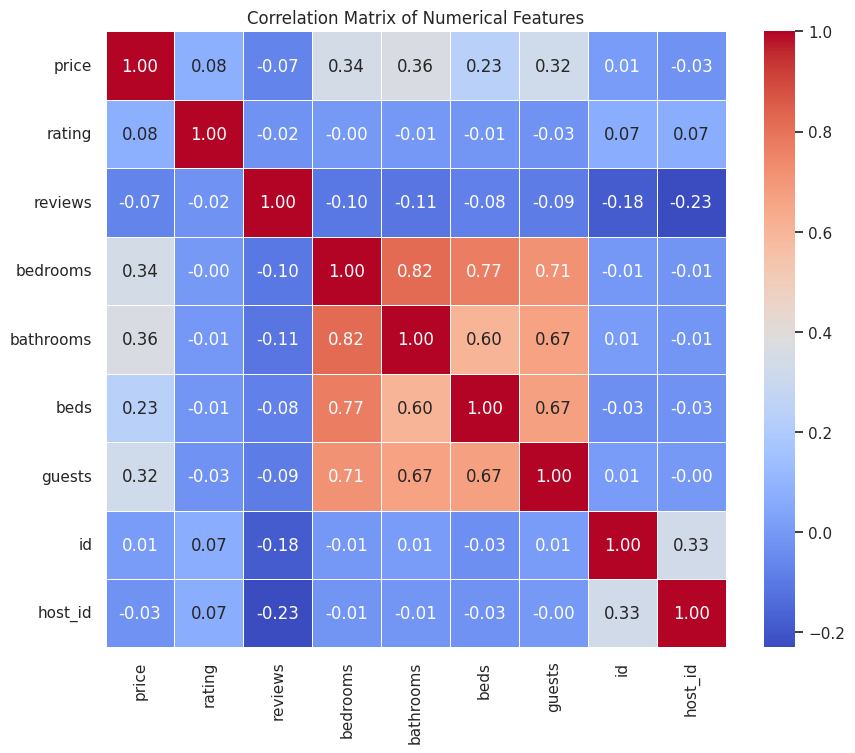

In [509]:
correlation_matrix = airbnb_dataset[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

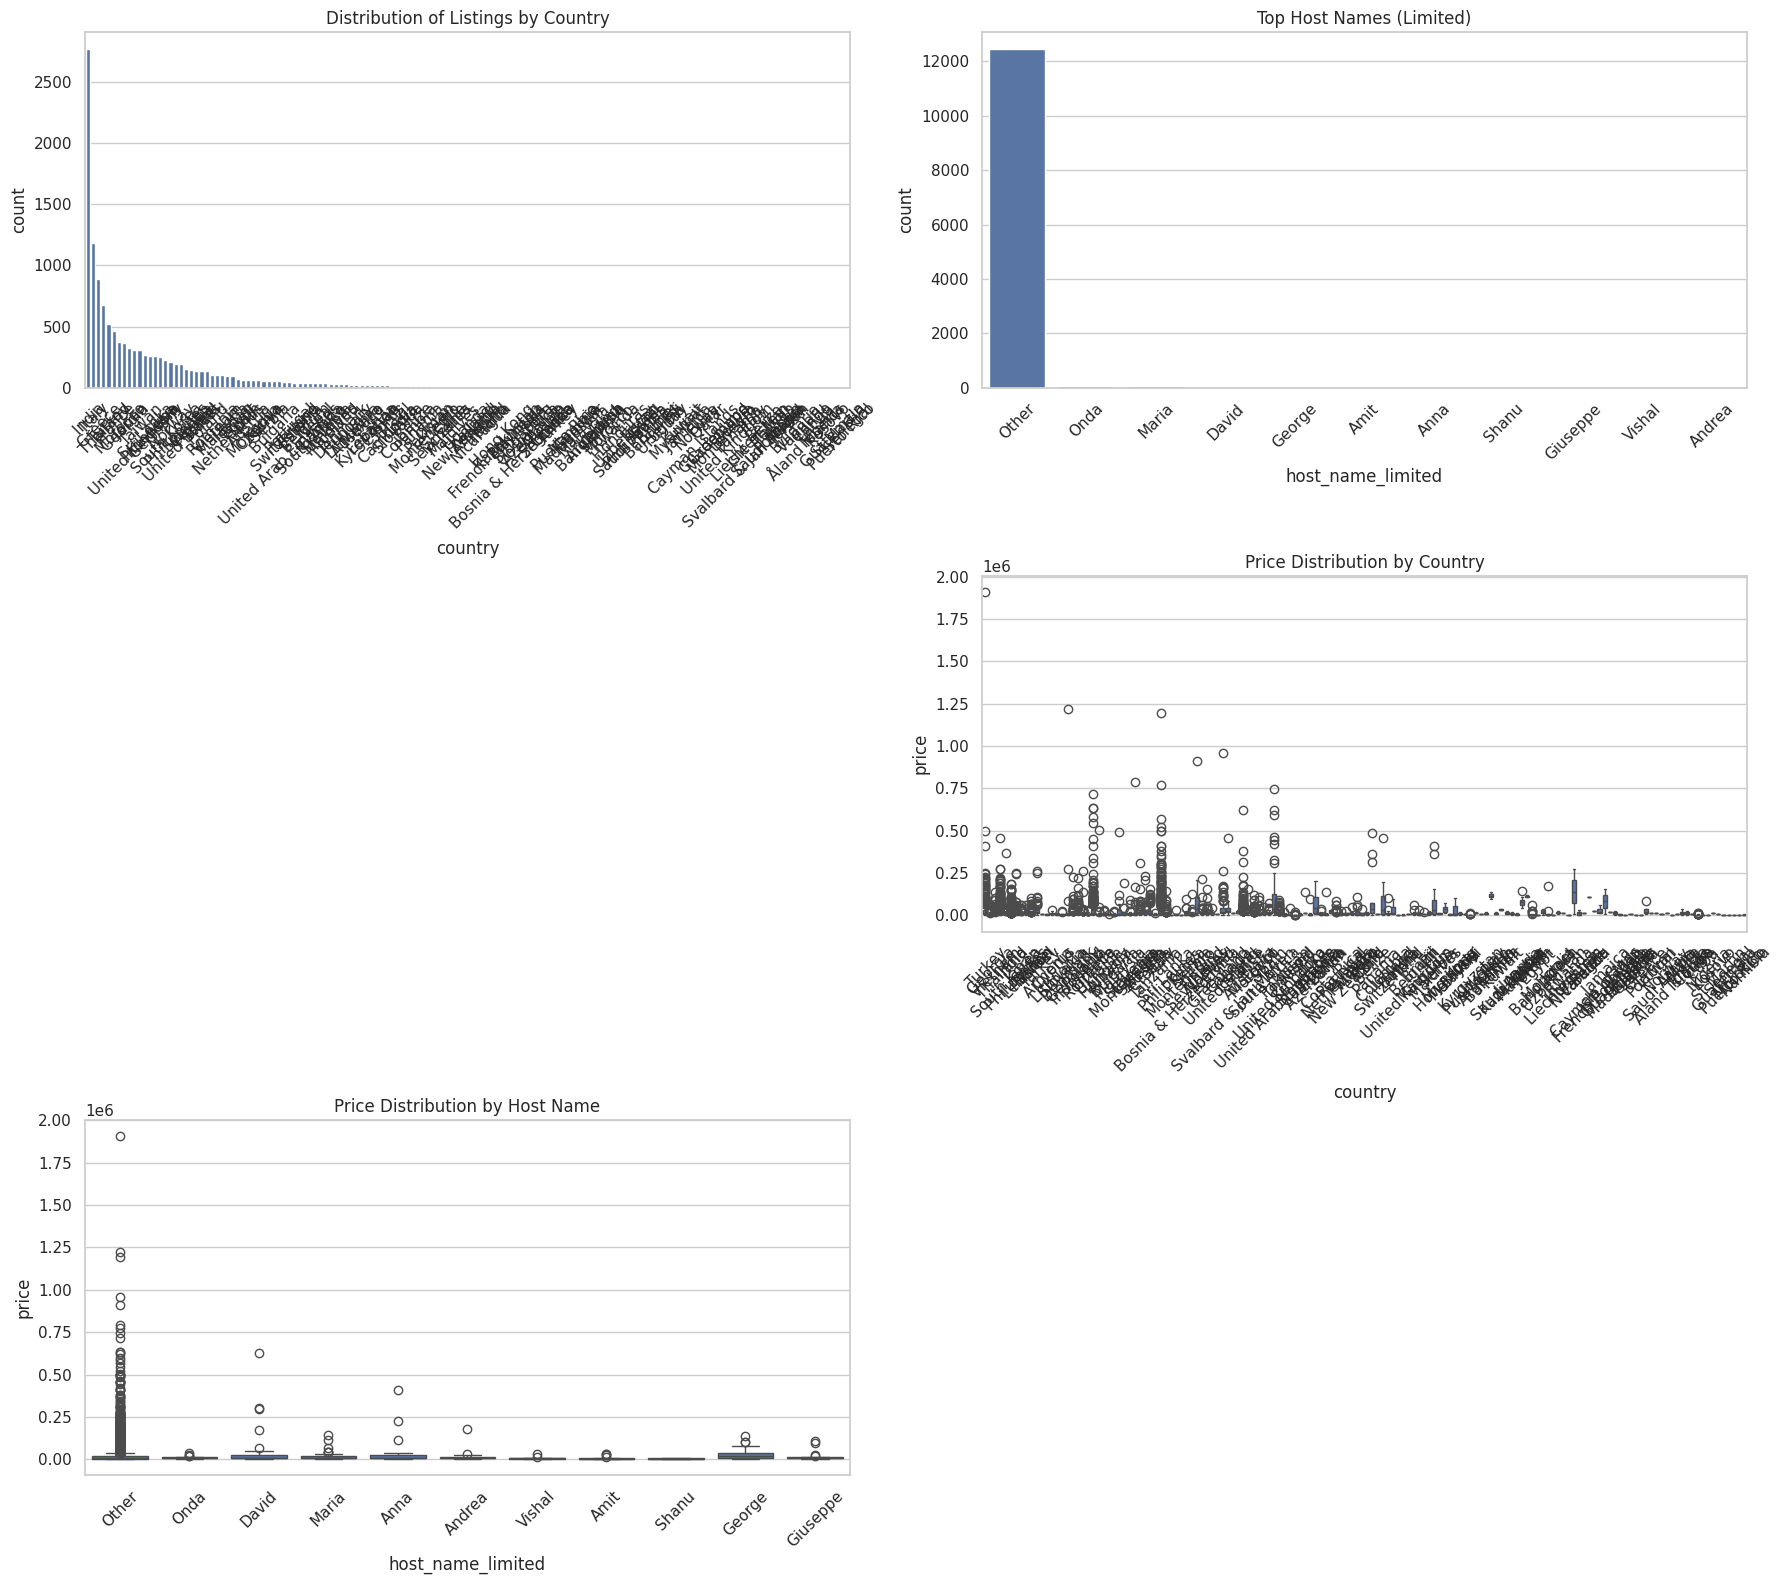

In [510]:
top_hosts = airbnb_dataset['host_name'].value_counts().nlargest(10).index
airbnb_dataset['host_name_limited'] = airbnb_dataset['host_name'].where(airbnb_dataset['host_name'].isin(top_hosts), 'Other')

sns.set(style="whitegrid")

plt.figure(figsize=(18, 16))

plt.subplot(3, 2, 1)
sns.countplot(data=airbnb_dataset, x='country', order=airbnb_dataset['country'].value_counts().index)
plt.title('Distribution of Listings by Country')
plt.xticks(rotation=45)

plt.subplot(3, 2, 2)
sns.countplot(data=airbnb_dataset, x='host_name_limited', order=airbnb_dataset['host_name_limited'].value_counts().index)
plt.title('Top Host Names (Limited)')
plt.xticks(rotation=45)

plt.subplot(3, 2, 4)
sns.boxplot(data=airbnb_dataset, x='country', y='price')
plt.title('Price Distribution by Country')
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)
sns.boxplot(data=airbnb_dataset, x='host_name_limited', y='price')
plt.title('Price Distribution by Host Name')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [511]:
missing_values = airbnb_dataset.isnull().sum()

missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with missing values:\n")
print(missing_values)

Columns with missing values:

rating       4238
checkout     2450
checkin       800
host_name       8
reviews         1
dtype: int64


In [512]:
airbnb_dataset.drop(['rating', 'reviews', 'checkin', 'checkout'], axis=1, inplace=True)

airbnb_dataset['host_name'].fillna('Unknown', inplace=True)

<ipython-input-512-af3dd8c486cf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_dataset['host_name'].fillna('Unknown', inplace=True)


In [513]:
missing_values = airbnb_dataset.isnull().sum()

missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with missing values:\n")
print(missing_values)

Columns with missing values:

Series([], dtype: int64)


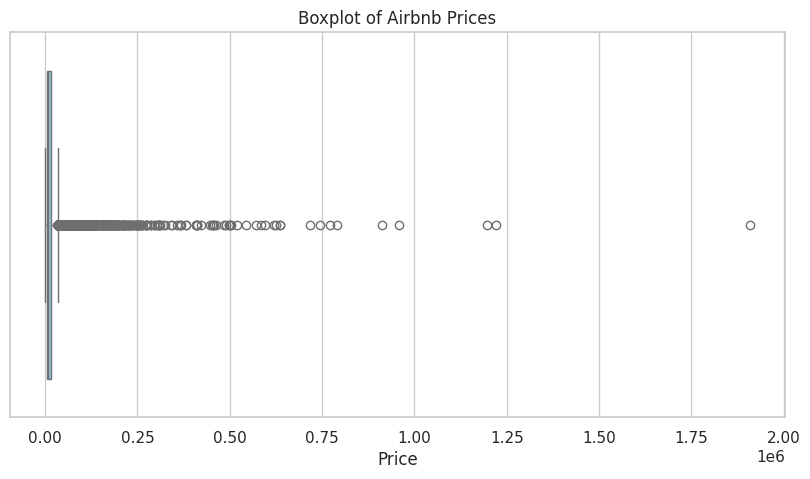

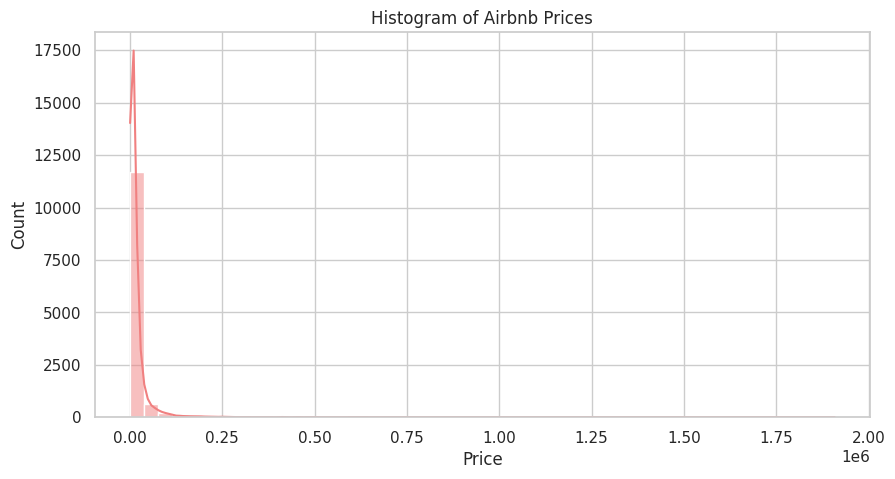

In [514]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=airbnb_dataset['price'], color='skyblue')
plt.title('Boxplot of Airbnb Prices')
plt.xlabel('Price')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(airbnb_dataset['price'], bins=50, kde=True, color='lightcoral')
plt.title('Histogram of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [515]:
Q1 = airbnb_dataset['price'].quantile(0.25)
Q3 = airbnb_dataset['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = airbnb_dataset[(airbnb_dataset['price'] < lower_bound) | (airbnb_dataset['price'] > upper_bound)]
print(f"Number of outliers in price: {len(outliers)}")

airbnb_dataset_cleaned = airbnb_dataset[(airbnb_dataset['price'] >= lower_bound) & (airbnb_dataset['price'] <= upper_bound)]

print(f"Dataset shape after removing outliers: {airbnb_dataset_cleaned.shape}")

Number of outliers in price: 1273
Dataset shape after removing outliers: (11532, 20)


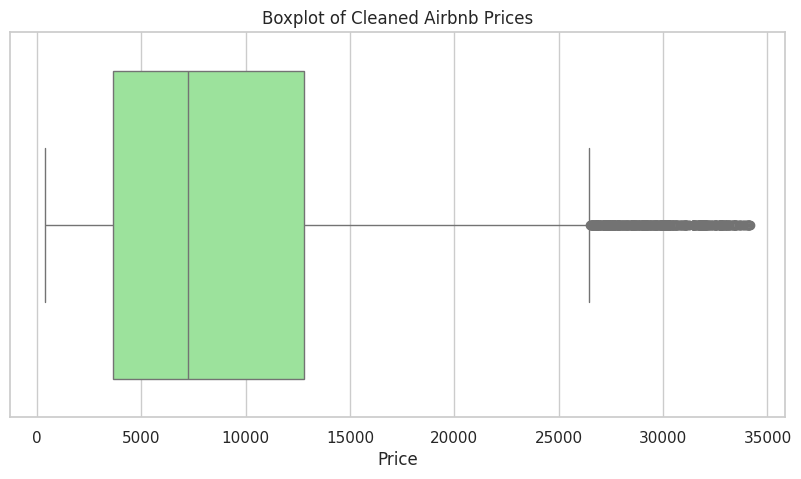

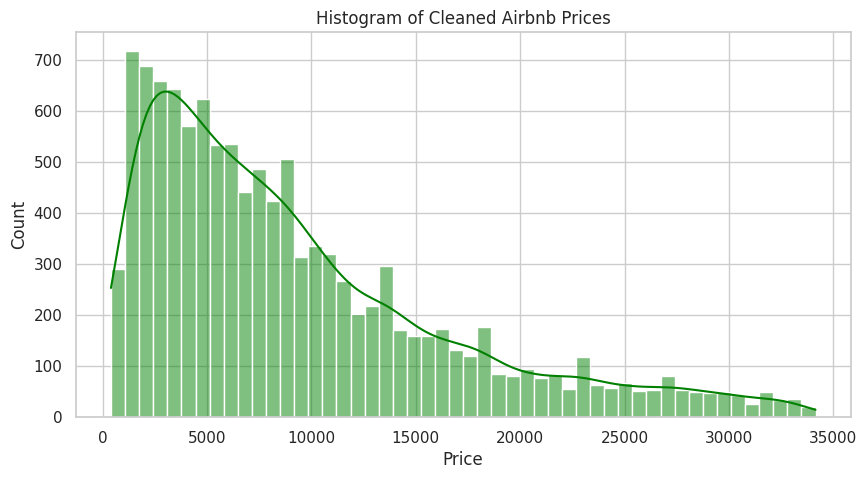

In [516]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=airbnb_dataset_cleaned['price'], color='lightgreen')
plt.title('Boxplot of Cleaned Airbnb Prices')
plt.xlabel('Price')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(airbnb_dataset_cleaned['price'], bins=50, kde=True, color='green')
plt.title('Histogram of Cleaned Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [517]:
categorical_columns = airbnb_dataset.select_dtypes(include=['object', 'category']).columns

print(f"Number of categorical variables: {len(categorical_columns)}")

print("Categorical columns:")
print(categorical_columns.tolist())

Number of categorical variables: 10
Categorical columns:
['name', 'host_name', 'address', 'features', 'amenities', 'safety_rules', 'hourse_rules', 'img_links', 'country', 'host_name_limited']


In [518]:
airbnb_dataset['amenities'] = airbnb_dataset['amenities'].fillna('')
airbnb_dataset['amenities'] = airbnb_dataset['amenities'].apply(lambda x: [amenity.strip() for amenity in x.split(',')])

from collections import Counter
all_amenities = Counter([amenity for sublist in airbnb_dataset['amenities'] for amenity in sublist])
top_amenities = [amenity for amenity, count in all_amenities.most_common(20)]

for amenity in top_amenities:
    airbnb_dataset[f'amenity_{amenity}'] = airbnb_dataset['amenities'].apply(lambda x: int(amenity in x))


countries = airbnb_dataset['country'].unique()
encoder = LabelBinarizer()
country_encoded = encoder.fit_transform(airbnb_dataset['country'])


airbnb_dataset['country_encoded'] = [np.where(row == 1)[0][0] for row in country_encoded]

airbnb_dataset = airbnb_dataset.drop(['features', 'amenities', 'country', 'safety_rules', 'hourse_rules', 'host_name_limited'], axis=1)



airbnb_dataset = airbnb_dataset.drop(['id', 'img_links', 'address', 'name', 'host_name'], axis=1, errors='ignore')

print(f"Final dataset shape: {airbnb_dataset.shape}")

Final dataset shape: (12805, 30)


In [519]:
print(airbnb_dataset.dtypes)

Unnamed: 0                                                           int64
host_id                                                            float64
price                                                                int64
bathrooms                                                            int64
beds                                                                 int64
guests                                                               int64
toiles                                                               int64
bedrooms                                                             int64
studios                                                              int64
amenity_Unavailable: Carbon monoxide alarmCarbon monoxide alarm      int64
amenity_Wifi                                                         int64
amenity_Kitchen                                                      int64
amenity_Free parking on premises                                     int64
amenity_Unavailable: Smok

In [520]:
print("Column Names:")
for col in airbnb_dataset.columns:
    print(col)

Column Names:
Unnamed: 0
host_id
price
bathrooms
beds
guests
toiles
bedrooms
studios
amenity_Unavailable: Carbon monoxide alarmCarbon monoxide alarm
amenity_Wifi
amenity_Kitchen
amenity_Free parking on premises
amenity_Unavailable: Smoke alarmSmoke alarm
amenity_Pets allowed
amenity_TV
amenity_Air conditioning
amenity_Dedicated workspace
amenity_Washing machine
amenity_Long-term stays allowed
amenity_Hair dryer
amenity_Security cameras on property
amenity_Patio or balcony
amenity_Garden
amenity_Luggage drop-off allowed
amenity_Garden view
amenity_Private patio or balcony
amenity_Refrigerator
amenity_Mountain view
country_encoded


In [521]:
columns_to_normalize = airbnb_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
columns_to_normalize = [col for col in columns_to_normalize if col != 'price']


scaler = MinMaxScaler()
airbnb_dataset[columns_to_normalize] = scaler.fit_transform(airbnb_dataset[columns_to_normalize])


In [522]:
print(columns_to_normalize)

['Unnamed: 0', 'host_id', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios', 'amenity_Unavailable: Carbon monoxide alarmCarbon monoxide alarm', 'amenity_Wifi', 'amenity_Kitchen', 'amenity_Free parking on premises', 'amenity_Unavailable: Smoke alarmSmoke alarm', 'amenity_Pets allowed', 'amenity_TV', 'amenity_Air conditioning', 'amenity_Dedicated workspace', 'amenity_Washing machine', 'amenity_Long-term stays allowed', 'amenity_Hair dryer', 'amenity_Security cameras on property', 'amenity_Patio or balcony', 'amenity_Garden', 'amenity_Luggage drop-off allowed', 'amenity_Garden view', 'amenity_Private patio or balcony', 'amenity_Refrigerator', 'amenity_Mountain view', 'country_encoded']


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1742415360.0000 - val_loss: 3080337408.0000
Epoch 2/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1696043648.0000 - val_loss: 3046189056.0000
Epoch 3/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2134159744.0000 - val_loss: 3012643584.0000
Epoch 4/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2613681152.0000 - val_loss: 2978010624.0000
Epoch 5/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2298715648.0000 - val_loss: 2930318848.0000
Epoch 6/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1655787776.0000 - val_loss: 2877835520.0000
Epoch 7/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1561502336.0000 - val_loss: 2825846272.0000
Epoch 8/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1248776320.0000 - val_loss: 2779801344.0000
Epoch 9/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1324348800.0000 - val_loss: 2742414080.0000
Epoch 10/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 17938

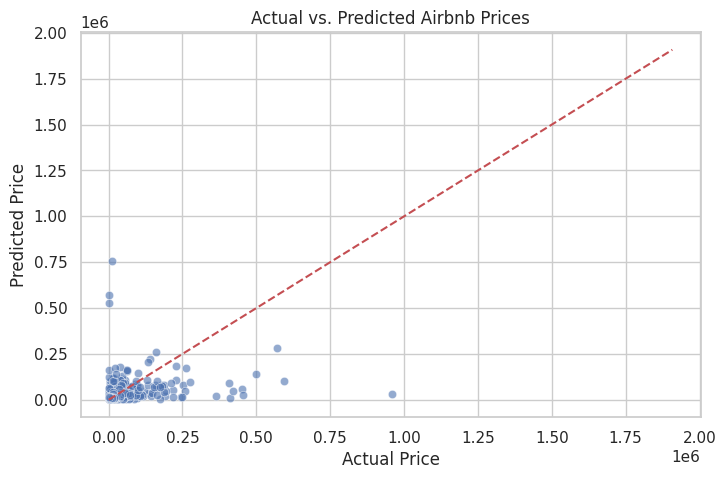

In [523]:

X = airbnb_dataset.drop(columns=['price'])
y = airbnb_dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Airbnb Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [524]:
architectures = [
    [128, 64, 32, 1],
    [256, 128, 1],
    [64, 32, 1],
    [128, 1],
]


for architecture in architectures:
    model = Sequential()
    model.add(Dense(architecture[0], activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))

    for units in architecture[1:-1]:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(0.2))

    model.add(Dense(architecture[-1], activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    y_pred = model.predict(X_test).flatten()

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Architecture: {architecture}")
    print(f"  MAE : {mae:.2f}")
    print(f"  MSE : {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²  : {r2:.2f}")
    print("-" * 40)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Architecture: [128, 64, 32, 1]
  MAE : 13660.36
  MSE : 1763011200.00
  RMSE: 41988.23
  R²  : -0.02
----------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Architecture: [256, 128, 1]
  MAE : 13618.04
  MSE : 1585847296.00
  RMSE: 39822.70
  R²  : 0.08
----------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Architecture: [64, 32, 1]
  MAE : 13480.70
  MSE : 1480675968.00
  RMSE: 38479.55
  R²  : 0.14
----------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Architecture: [128, 1]
  MAE : 14715.34
  MSE : 1579842560.00
  RMSE: 39747.23
  R²  : 0.09
----------------------------------------


In [525]:
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
ann_model.compile(optimizer=Adam(), loss='mean_squared_error')
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

ann_preds = ann_model.predict(X_test).flatten()
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

final_preds = (ann_preds + rf_preds + gb_preds) / 3

mae = mean_absolute_error(y_test, final_preds)
mse = mean_squared_error(y_test, final_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_preds)

print(f"Ensemble Mean Absolute Error (MAE): {mae:.2f}")
print(f"Ensemble Mean Squared Error (MSE): {mse:.2f}")
print(f"Ensemble Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Ensemble R² Score: {r2:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Ensemble Mean Absolute Error (MAE): 11494.45
Ensemble Mean Squared Error (MSE): 1298761710.72
Ensemble Root Mean Squared Error (RMSE): 36038.34
Ensemble R² Score: 0.25
